# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
import os
os.getcwd()

'C:\\Users\\kings\\Desktop\\cohort-analysis\\notebooks'

# Load Data

In [6]:
data = pd.read_csv("C:/Users/kings/Desktop/cohort-analysis/data/Dataset_ecommerce.csv")
data.head(3)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali


In [7]:
data['Quantity'].max()

100

In [8]:
data['UnitPrice'].max()

100.0

# Clean Data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [40]:
#Descriptive Statistics
data.describe(include = "all")
data.head(3)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali


In [29]:
# Check for Missing values
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [44]:
# Drop missing values
data.dropna(inplace = True)

In [46]:
# Check for Info on daqtaframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [54]:
# Convert InvoiceDate to Datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


# Exploratory Data Analysis

## Analysis by country

In [64]:
quantity_by_country = data.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending = False).reset_index()

In [66]:
quantity_by_country.head(3)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229


In [ ]:
#visualise top 10 countries by sales

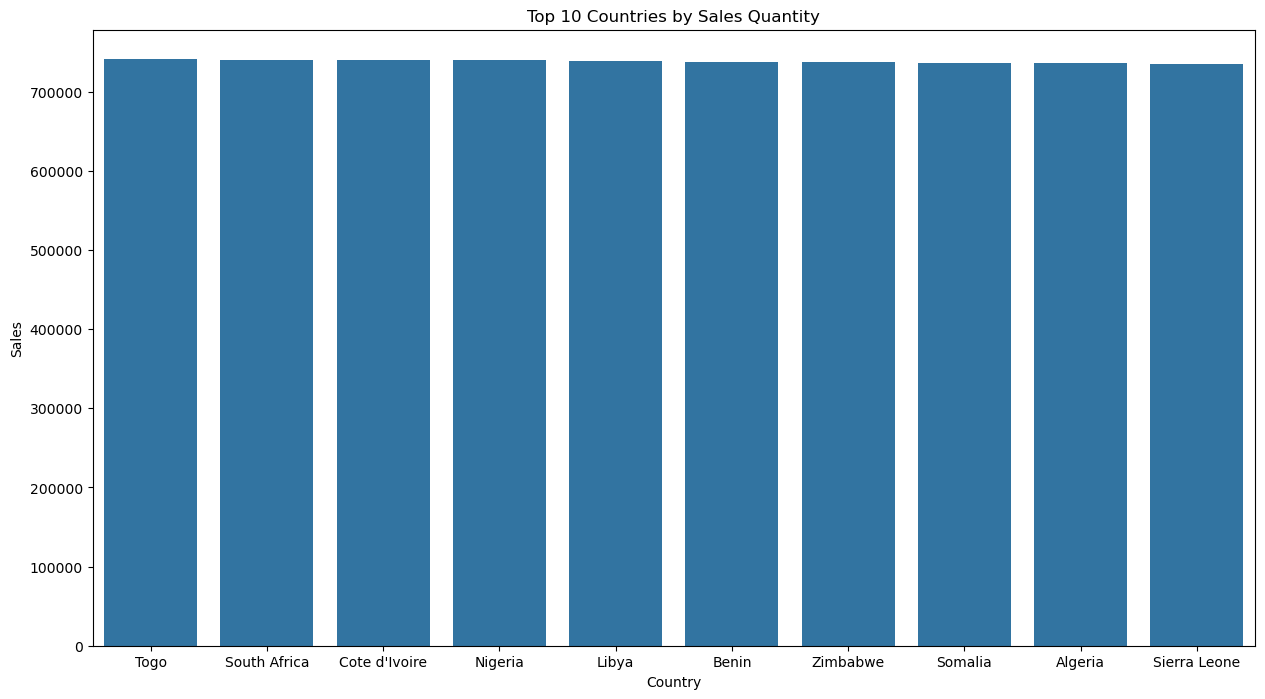

In [265]:
top_10_countries = quantity_by_country.head(10)

plt.figure(figsize = (15,8))
ax = sns.barplot(x = "Country", y = "Quantity", data = top_10_countries)

plt.xlabel("Country")
plt.ylabel("Sales")
plt.title("Top 10 Countries by Sales Quantity")
plt.show()

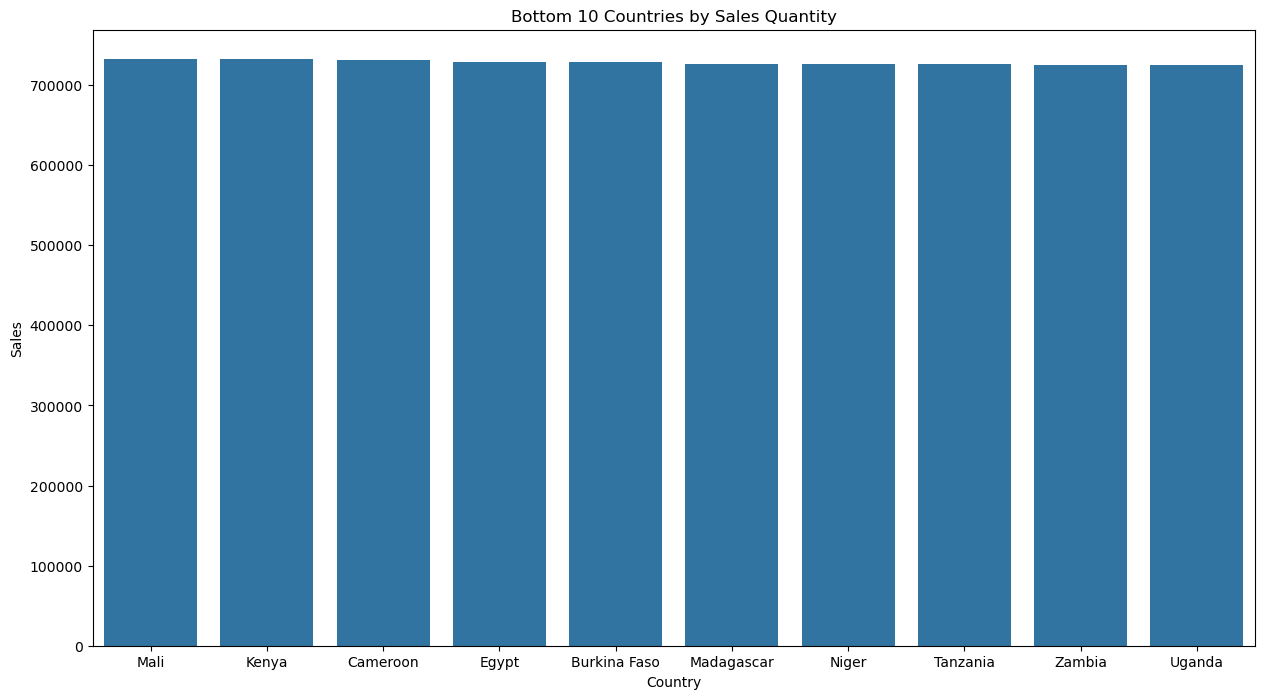

In [267]:
bottom_10_countries = quantity_by_country.tail(10)

plt.figure(figsize = (15,8))
ax = sns.barplot(x = "Country", y = "Quantity", data = bottom_10_countries)

plt.xlabel("Country")
plt.ylabel("Sales")
plt.title("Bottom 10 Countries by Sales Quantity")
plt.show()

*Analysis of Countries by Customers*

In [145]:
countries_by_customer = data.groupby("Country")["CustomerID"].nunique().reset_index()
countries_by_customer = countries_by_customer.sort_values("CustomerID", ascending = False).reset_index()

In [155]:
countries_by_customer.head(3)

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053


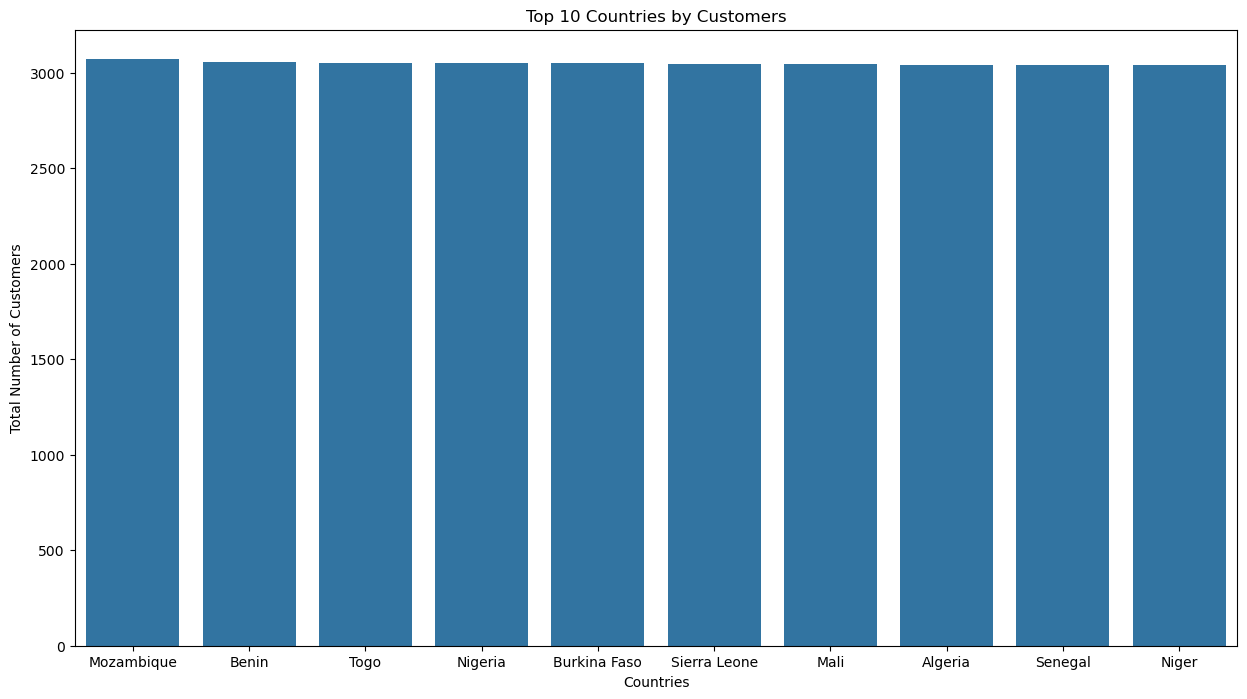

In [157]:
#Draw a plot of top 10 countries with most number of customers
top_10_countries_by_customers = countries_by_customer.head(10)

plt.figure(figsize = (15,8))
sns.barplot(x = "Country", y = "CustomerID", data = top_10_countries_by_customers)

plt.xlabel("Countries")
plt.ylabel("Total Number of Customers")
plt.title("Top 10 Countries by Customers")
plt.show()

## Sales trend Visualisation

In [275]:
#Total sales 

total_sales = data['Sales'].sum()

print(f"Total Sales Amount: {total_sales:,.2f}")

Total Sales Amount: 1,037,435,721.11


In [242]:
data['Month'] = data['InvoiceDate'].dt.to_period('M')

data['Sales'] = data['Quantity'] * data['UnitPrice']

monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()

monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

In [244]:
monthly_sales.head(5)

,Month,Sales
0,2010-12-01,67923671.84
1,2011-01-01,55829330.62
2,2011-02-01,52085357.17
3,2011-03-01,71372098.54
4,2011-04-01,59140029.32


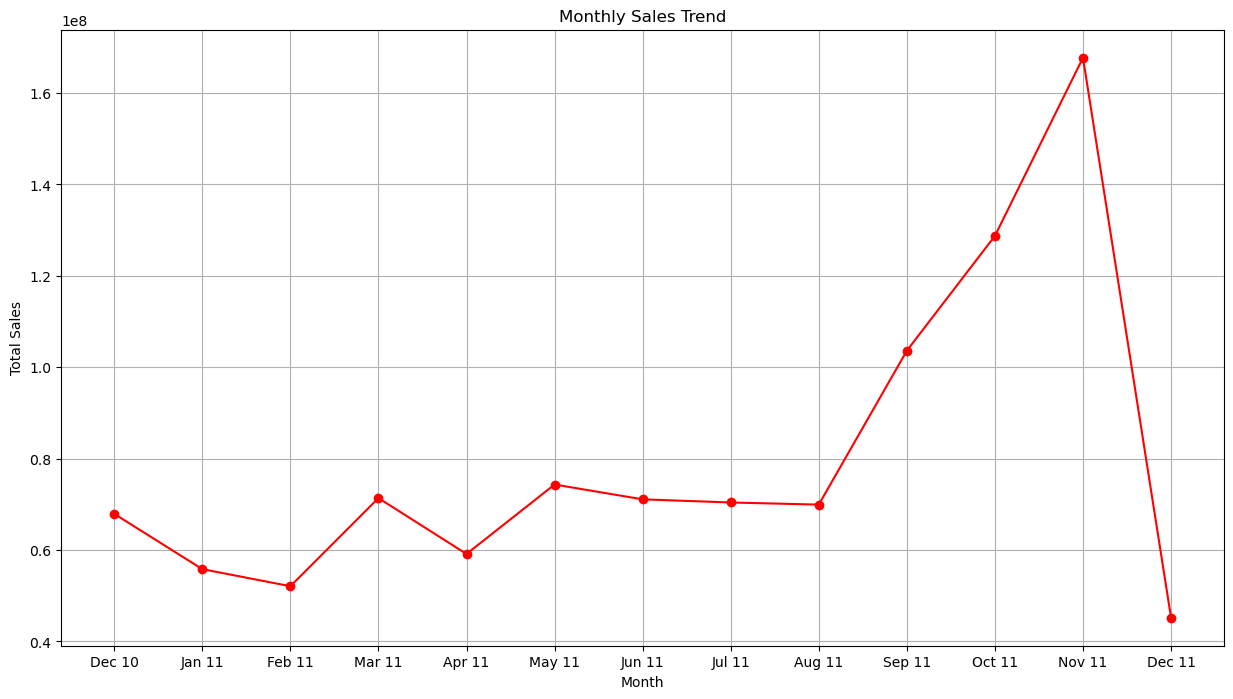

In [254]:
#Line Plot of Monthly sales

plt.figure(figsize = (15,8))
plt.plot(
    monthly_sales['Month'].dt.strftime('%b %y'), 
    monthly_sales['Sales'],                      
    marker='o',                                  
    linestyle='-',                              
    color='red'                                 
)

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")

plt.grid(True)

# Cohort Analysis

In [259]:
data.head(3)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Month,Sales
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,2010-12,4796.22


In [277]:
#Get Month with Year Column
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [279]:
data["InvoiceDate"] = data["InvoiceDate"].apply(get_month)

In [281]:
data.head(3)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Month,Sales
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12,4796.22


In [283]:
#Create the Cohort Date Column
def get_cohort_date(data):
    data["cohort date"] = data.groupby ("CustomerID")["InvoiceDate"].transform("min")
    return data["cohort date"]

In [285]:
data["cohort date"] = get_cohort_date(data)

In [289]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Month,Sales,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-12,913.25,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-12,8521.10,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-12,560.98,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-12,3592.35,2011-08-01


## Cohort Index

In [297]:
def get_year_and_month(data, col):
    month = data[col].dt.month
    year = data[col].dt.year
    return month, year

In [301]:
first_month, first_year = get_year_and_month(data, "cohort date")

In [303]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort date, Length: 406829, dtype: int32

In [305]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort date, Length: 406829, dtype: int32

In [311]:
latest_month, latest_year = get_year_and_month(data, "InvoiceDate")

In [313]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [315]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

In [319]:
#Create Cohort Index

def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = lates_month - first_month
    index = year_diff*12 + month_diff + 1
    return index

In [321]:
data["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)

In [323]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Month,Sales,cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-12,913.25,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-12,8521.10,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-12,560.98,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-12,3592.35,2011-08-01,5


## Cohort Table

In [344]:
cohort_info = data.groupby(["cohort date", "cohort_index"])["CustomerID"].nunique().reset_index()

In [350]:
cohort_info.rename(columns = {"CustomerID" : "Number of Customers"}, inplace = True)

In [352]:
cohort_info

,cohort date,cohort_index,Number of Customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [372]:
#Pivot table
cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of Customers")
cohort_table.index = cohort_table.index.strftime("%B %Y")

In [374]:
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cohort Pivot Chart

<Axes: xlabel='cohort_index', ylabel='cohort date'>

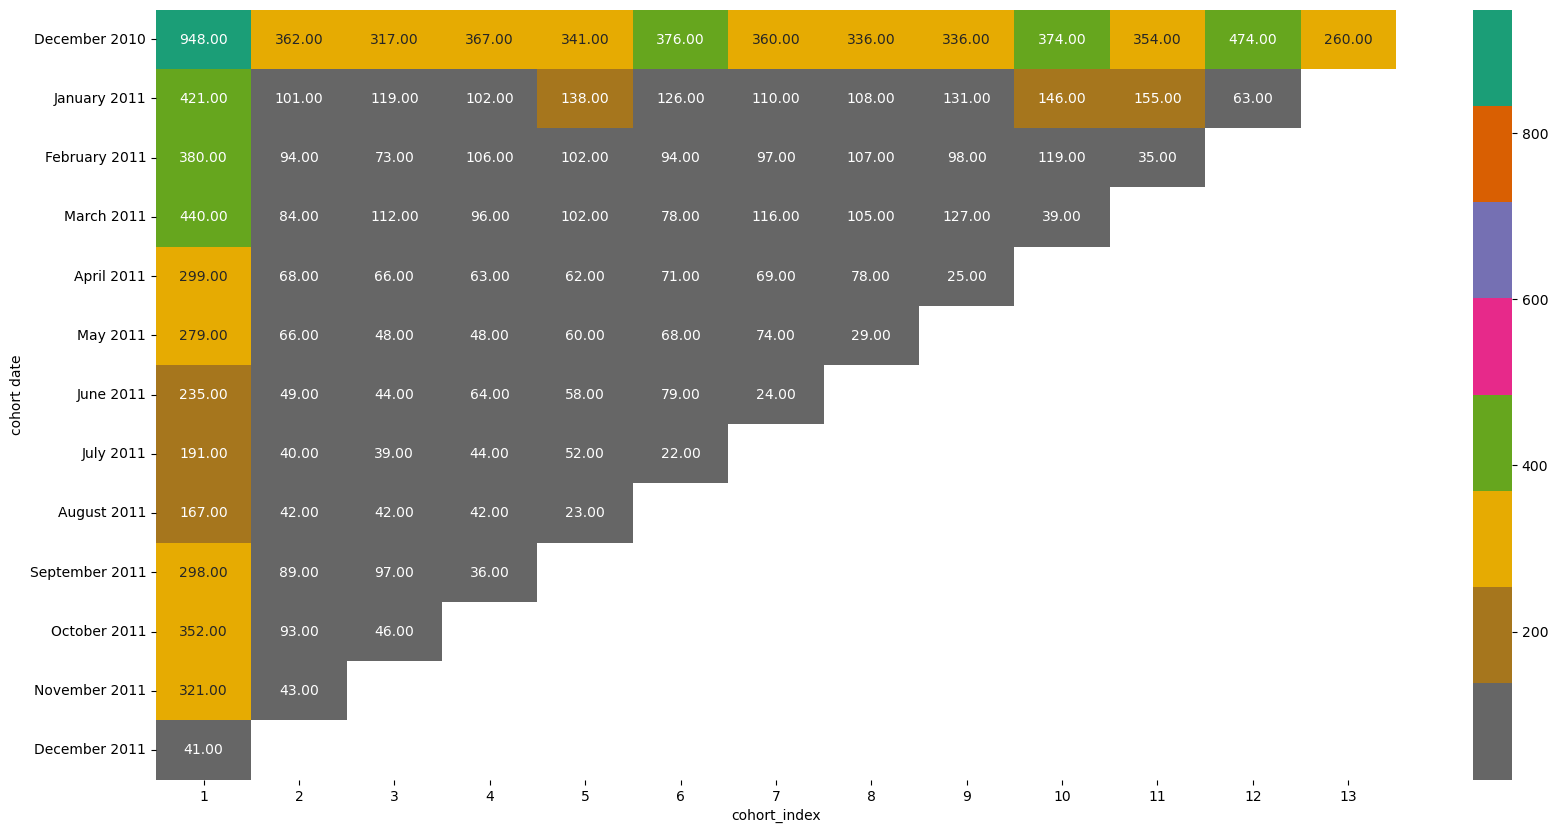

In [390]:
# Visualise Cohort Pivot Table
plt.figure(figsize = (20,10))
sns.heatmap(cohort_table, annot = True, cmap = "Dark2_r", fmt= ".2f")

In [396]:
#new cohort table for percentage
percent_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)

In [398]:
percent_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

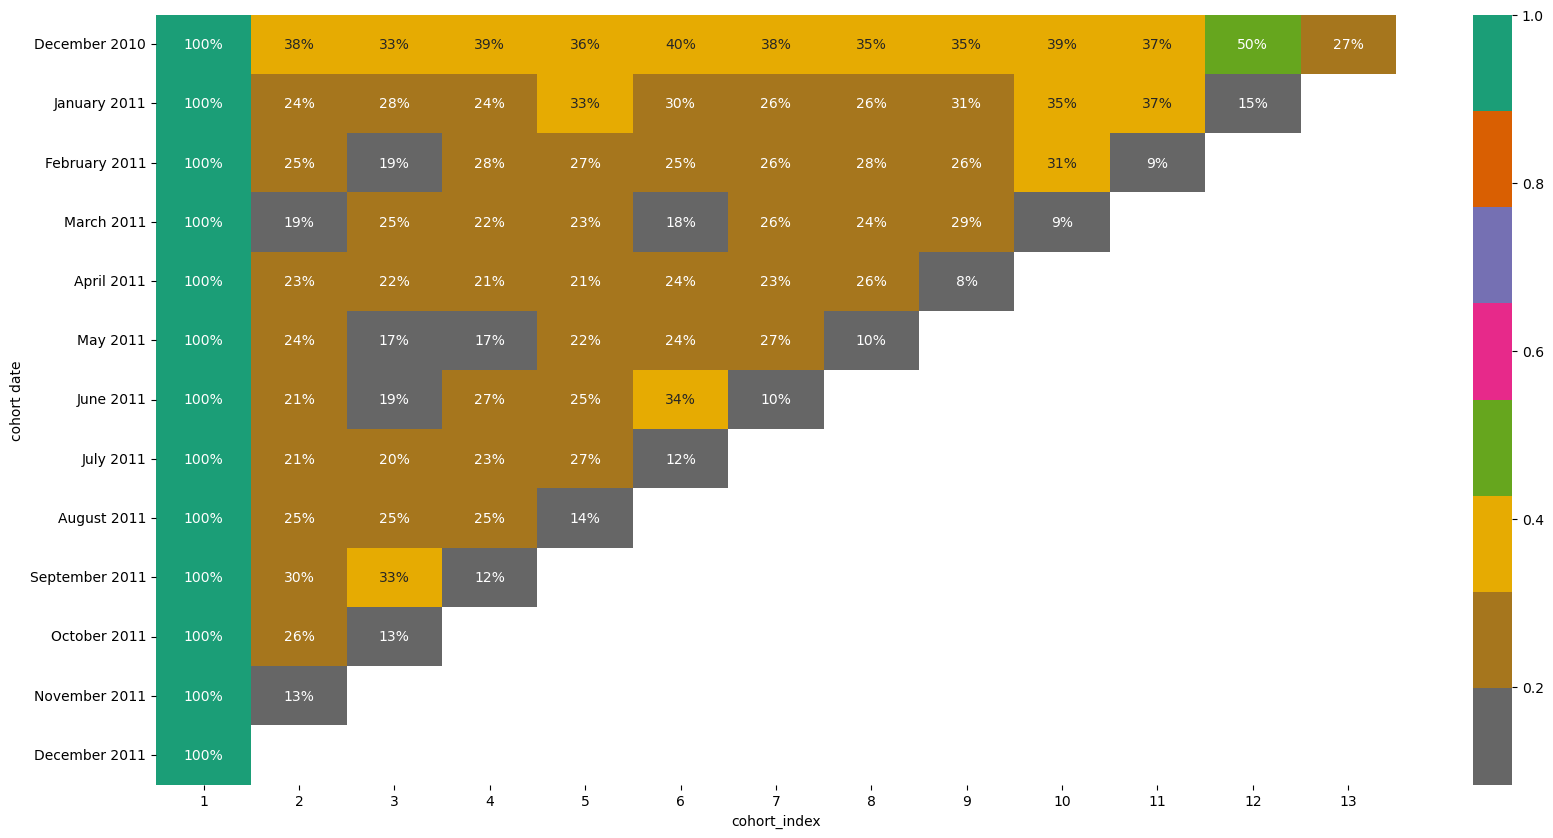

In [404]:
plt.figure(figsize = (20,10))
sns.heatmap(percent_cohort_table, annot = True, cmap = "Dark2_r", fmt= ".0%")

## Using Pivot Table and Chart

In [497]:
#Quantity Bought
quantity_bought = data.groupby(["cohort date", "cohort_index"]) ["Quantity"].sum().reset_index()

In [499]:
quantity_bought

,cohort date,cohort_index,Quantity
0,2010-12-01,1,1350834
1,2010-12-01,2,546873
2,2010-12-01,3,462374
3,2010-12-01,4,613244
4,2010-12-01,5,510943
...,...,...,...
86,2011-10-01,2,181888
87,2011-10-01,3,44776
88,2011-11-01,1,574330
89,2011-11-01,2,56021


In [501]:
#quantity_table
quantity_table = quantity_bought.pivot(index = "cohort date", columns = ["cohort_index"], values = "Quantity")
quantity_table.index = quantity_table.index.strftime("%B %Y")

In [503]:
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
January 2011,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
February 2011,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
March 2011,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
April 2011,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
May 2011,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
June 2011,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

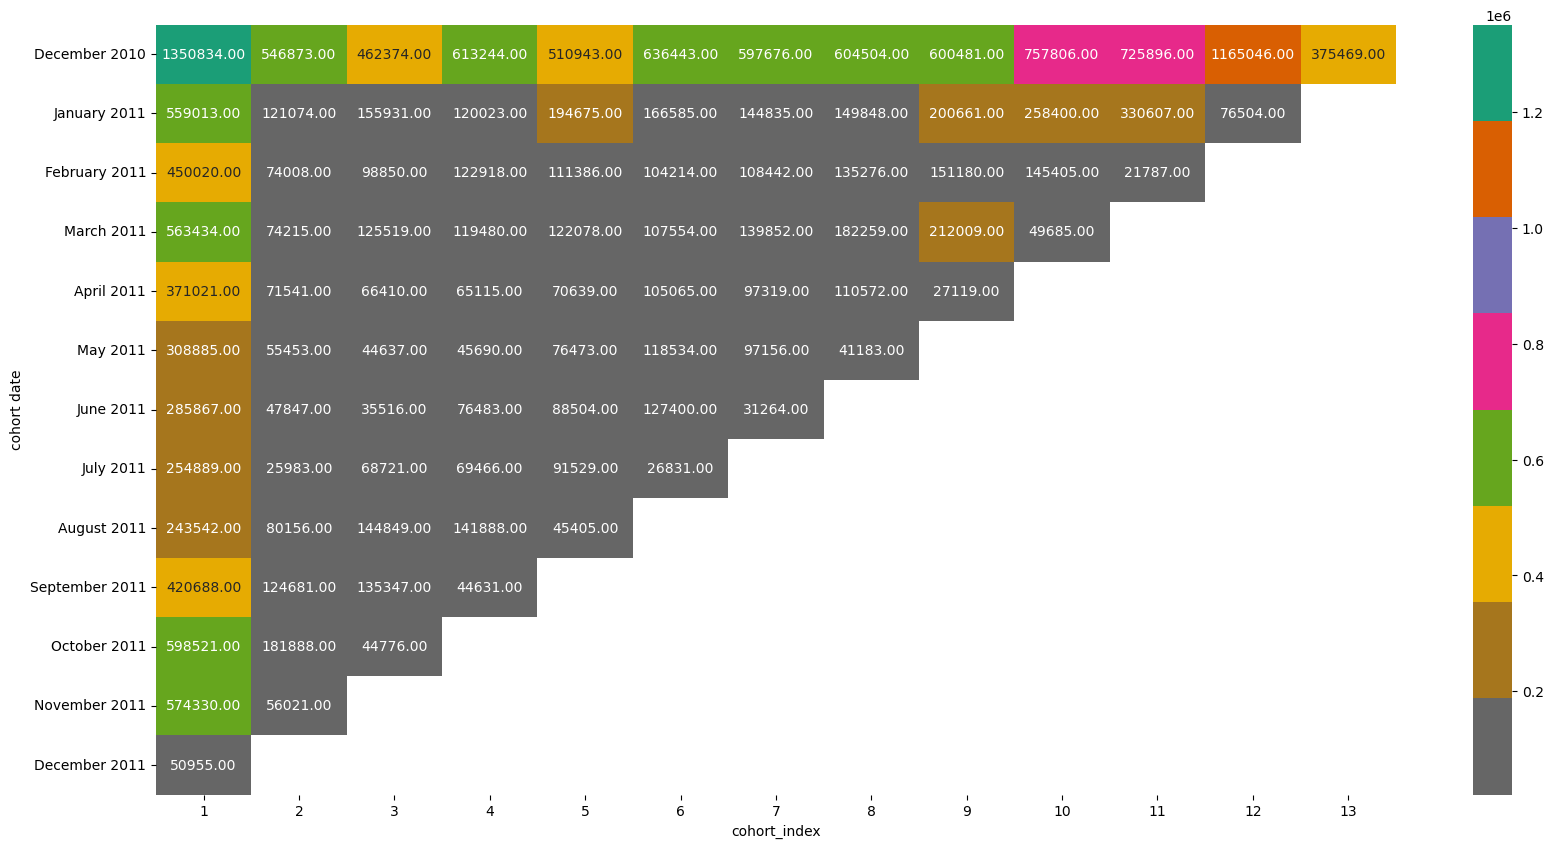

In [505]:
#Quantity Table Visualisation
plt.figure(figsize = (20,10))
sns.heatmap(quantity_table, annot = True, cmap = "Dark2_r", fmt= ".2f")